In [1]:
#!pip install gensim
import numpy as np
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as hcluster
import collections


import warnings
warnings.filterwarnings('ignore')

In [2]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x7f0e88bb0ef0>)

In [3]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [4]:
from sklearn.cluster import KMeans

In [7]:
def clusterization(word):
  with open ("data_essay_2.txt","r",encoding="utf-8-sig") as my_file:
    read_file = my_file.read()
    adjectives = re.findall(r'(\w*)_%s' % word, str(read_file),flags= re.DOTALL)
    dictionary = {}
    for adj in adjectives:
        adj = adj + "_A"
        if adj in model:            
            dictionary[adj] = model[adj]
        else:
            print('Увы, слова "%s" нет в модели!' % adj)
    noun = "%s_S" % word
    phrase_dict = {}
    
    for k, v in dictionary.items():
      dt = v + model[noun]
      couple = k.strip("_A") + "_" + word
      phrase_dict[couple] = dt
    
    dictolist = []
    for d in phrase_dict.values():
      dictolist.append(d)
    X = np.array(dictolist)
    Z = hcluster.linkage(X,'complete')
    plt.figure()
    dn = hcluster.dendrogram(Z)
    print()
    print("Словосочетания со словом \"%s\":" % word)
    print()
    for k in phrase_dict.keys():
      print(k)
    print()
    print("Иерархическая кластеризация")
    print()
    plt.show()
    clusters = hcluster.fcluster(Z, 1)
    print(clusters)
    #np.mean(clusters)
    print('Estimated number of clusters: %d' % len(set(clusters)))
    print()
    if len(set(clusters)) < 2:
      kmeans = KMeans(n_clusters=len(set(clusters)) + 2).fit(X)
    else:
      kmeans = KMeans(n_clusters=len(set(clusters))).fit(X)
    print("Кластеры, полученные методом K-средних")
    print(kmeans.predict(dictolist))



Словосочетания со словом "торт":

свадебный_торт
вкусный_торт
праздничный_торт
шоколадный_торт
детский_торт
огромный_торт
большой_торт
красивый_торт
готовый_торт
домашний_торт

Иерархическая кластеризация



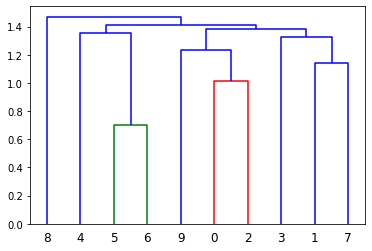

[1 1 1 1 1 1 1 1 1 1]
Estimated number of clusters: 1

Кластеры, полученные методом K-средних
[0 0 0 0 0 1 1 0 2 0]



Словосочетания со словом "машина":

стиральный_машина
новый_машина
виртуальный_машина
посудомоечный_машина
боевой_машина
швейный_машина
государственный_машина
поисковый_машина
пожарный_машина
хороший_машина

Иерархическая кластеризация



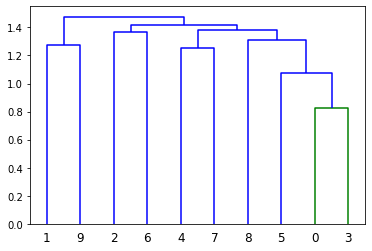

[4 1 2 4 3 4 2 3 4 1]
Estimated number of clusters: 4

Кластеры, полученные методом K-средних
[0 1 3 0 2 0 3 2 2 1]



Словосочетания со словом "дверь":

входной_дверь
металлический_дверь
задний_дверь
открытый_дверь
железный_дверь
стальной_дверь
закрытый_дверь
водительский_дверь
передний_дверь
стеклянный_дверь

Иерархическая кластеризация



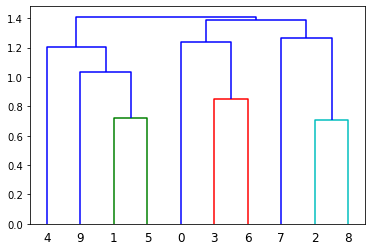

[2 1 3 2 1 1 2 3 3 1]
Estimated number of clusters: 3

Кластеры, полученные методом K-средних
[2 0 1 2 0 0 2 1 1 0]



Словосочетания со словом "корабль":

космический_корабль
военный_корабль
боевой_корабль
линейный_корабль
большой_корабль
надводный_корабль
новый_корабль
американский_корабль
десантный_корабль
грузовой_корабль

Иерархическая кластеризация



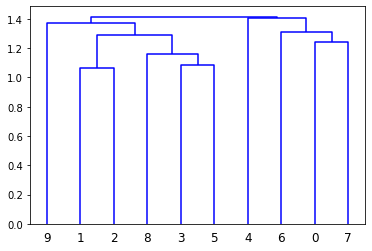

[4 1 1 2 4 2 4 4 2 3]
Estimated number of clusters: 4

Кластеры, полученные методом K-средних
[1 0 0 1 3 1 2 2 1 1]



Словосочетания со словом "книга":

красный_книга
новый_книга
электронный_книга
хороший_книга
настоящий_книга
гостевой_книга
детский_книга
большой_книга
телефонный_книга
настольный_книга

Иерархическая кластеризация



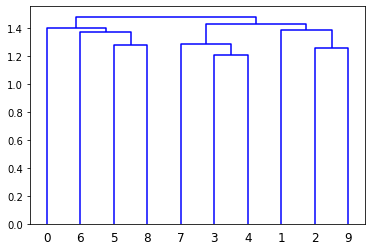

[1 2 2 2 2 1 1 2 1 2]
Estimated number of clusters: 2

Кластеры, полученные методом K-средних
[1 0 1 0 0 1 1 0 1 1]



Словосочетания со словом "винтовка":

снайперский_винтовка
пневматический_винтовка
штурмовой_винтовка
автоматический_винтовка
новый_винтовка
малокалиберный_винтовка
мелкокалиберный_винтовка
американский_винтовка
охотничий_винтовка
немецкий_винтовка

Иерархическая кластеризация



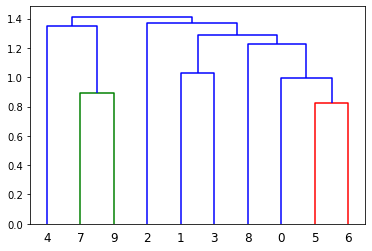

[2 2 2 2 1 2 2 1 2 1]
Estimated number of clusters: 2

Кластеры, полученные методом K-средних
[0 0 0 0 1 0 0 1 0 1]



Словосочетания со словом "взрыв":

большой_взрыв
ядерный_взрыв
мощный_взрыв
социальный_взрыв
атомный_взрыв
демографический_взрыв
сильный_взрыв
новый_взрыв
подземный_взрыв
настоящий_взрыв

Иерархическая кластеризация



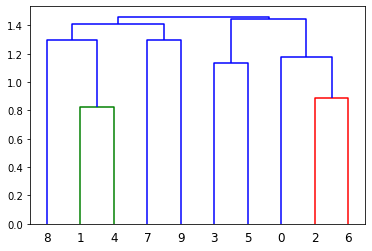

[4 1 4 3 1 3 4 2 1 2]
Estimated number of clusters: 4

Кластеры, полученные методом K-средних
[2 1 2 3 1 3 2 0 1 0]



Словосочетания со словом "кот":

черный_кот
рыжий_кот
белый_кот
домашний_кот
дикий_кот
любимый_кот
большой_кот
взрослый_кот
мартовский_кот
жирный_кот

Иерархическая кластеризация



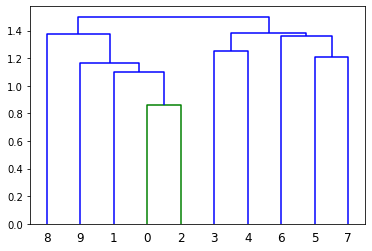

[1 1 1 2 2 2 2 2 1 1]
Estimated number of clusters: 2

Кластеры, полученные методом K-средних
[1 1 1 0 0 0 0 0 1 1]



Словосочетания со словом "елка":

новогодний_елка
главный_елка
рождественский_елка
искусственный_елка
городской_елка
живой_елка
большой_елка
кремлевский_елка
праздничный_елка
нарядный_елка

Иерархическая кластеризация



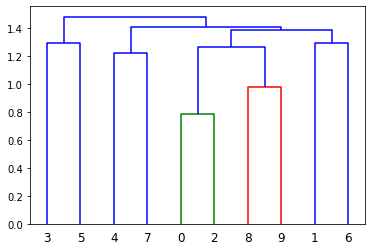

[3 5 3 1 2 1 5 2 4 4]
Estimated number of clusters: 5

Кластеры, полученные методом K-средних
[4 1 4 2 3 2 1 3 0 0]



Словосочетания со словом "еж":

морской_еж
противотанковый_еж
ушастый_еж
колючий_еж
обыкновенный_еж
серый_еж
синий_еж
старый_еж
черный_еж
маленький_еж

Иерархическая кластеризация



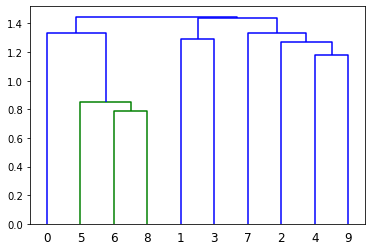

[1 2 3 2 3 1 1 3 1 3]
Estimated number of clusters: 3

Кластеры, полученные методом K-средних
[1 2 0 2 0 1 1 0 1 0]




In [8]:
word_list = ['торт','машина','дверь','корабль','книга','винтовка','взрыв','кот','елка','еж']
for w in word_list:
  clusterization(w)
  print()
  print()